# Chapter5: Complex Generation Example

In this chapter, we are going to generate complex data with multiple modification options.  
We are going to define the latter 20% of the data to be anomaly data for several sensors.  
The following list specifies attributes of each sensor:  

Sensor 1~4:  Drift [Sensor1, 3: sum, Sensor2, 4: sub]  
Sensor 5:    5 and 10 Binomial Selection  
Sensor 6:    Sin(t) Oscillation w/ Gaussian Noise  
Sensor 7~10: Expanded Lorenz Attractor w/ Gaussian Noise

In [1]:
import numpy as np

from math import exp
from scipy.stats import random_correlation
from data_generator import SensorDataGenerator as sdg

dg = sdg()
seed = 20171221
sample_size = 5000

In [2]:
# Multivariate-Normal Baseline
mu = np.linspace(5, 50, 10).astype(int)
eigs = np.array([exp(i) for i in np.arange(10, 0, -1)])
eigs *= 10/eigs.sum()
cov = random_correlation.rvs(eigs)

snames = ""
for i in range(1, 11):
    snames += " Sensor"+str(i)
    
dg.generation_input.add_option(sensor_names=snames,
                               distribution="multivariatenormal",
                               mu=mu,
                               cov=cov)

In [3]:
# Drift Baseline [Normal]
event_interval = np.random.poisson(500, 8).cumsum()
event_interval[-1] = int(sample_size*0.8)
frm=0
for idx in event_interval:
    dg.generation_input.add_option(sensor_names="Drift",
                                   eq="x*exp(x)",
                                   initial={"x":0},
                                   step={"x":0.002},
                                   frm=frm,
                                   to=idx)
    frm=idx

In [4]:
# Drift Baseline [Anomaly]
event_interval = np.random.poisson(500, 2).cumsum()
event_interval += int(sample_size*0.8)
event_interval[-1] = sample_size
frm=int(sample_size*0.8)
for idx in event_interval:
    dg.generation_input.add_option(sensor_names="Drift",
                                   eq="x*exp(x)",
                                   initial={"x":0},
                                   step={"x":0.001},
                                   frm=frm,
                                   to=idx)
    frm=idx

In [5]:
# Sin(t) Baseline
rad = 180./np.pi
dg.generation_input.add_option(sensor_names="Sin_t",
                               eq="10*(1+sin(t))",
                               initial={"t":0},
                               step={"t":0.0003*rad})

In [6]:
# Lorenz Attractor Baseline
snames = ""
for i in range(7, 11):
    snames += " Attr"+str(i)
    
dg.generation_input.add_option(sensor_names=snames,
                               attractor="lorenz",
                               rho=28.0,
                               sigma=10.0,
                               beta=8.0/3.0,
                               initial=[1.0,1.0,1.0],
                               anomaly=0.2,
                               features=4)

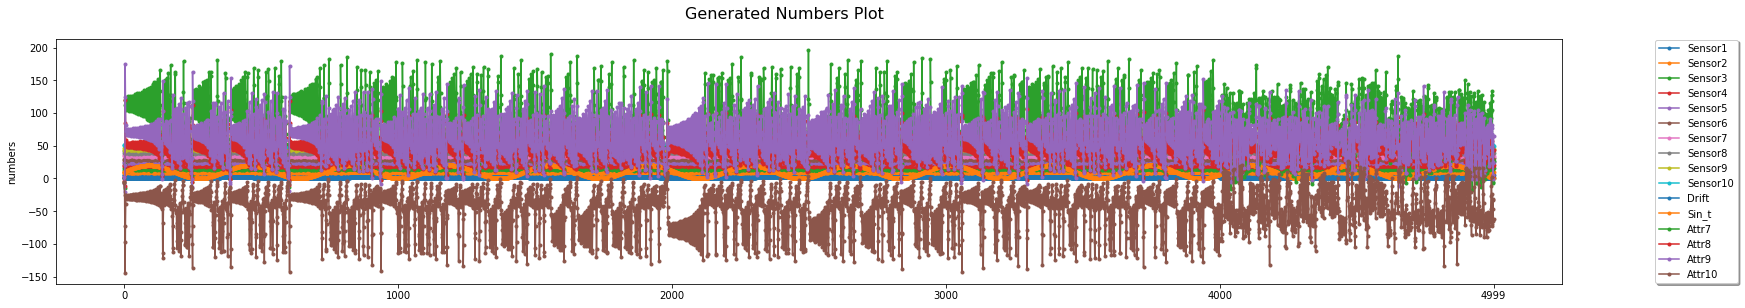

In [7]:
dg.generate(sample_size, seed=seed)
dg.plot_data()

In [8]:
# Sensor 1~4
for i in [1,3]:
    dg.sum(sensors=["Sensor"+str(i), "Drift"])
for i in [2,4]:
    dg.sub(sensors=["Sensor"+str(i), "Drift"])
dg.drop_sensors(sensors=["Drift"])

# Sensor 5
dg.multinomial_process(sensors=["Sensor5", "Sensor10"], pval=[0.4, 0.6], save_to="Sensor5")

# Sensor 6
dg.sum(sensors=["Sensor6", "Sin_t"])
dg.drop_sensors(sensors=["Sin_t"])

# Sensor 7~10
for i in range(7, 11):
    dg.sum(sensors=["Sensor"+str(i), "Attr"+str(i)])
    dg.drop_sensors(sensors=["Attr"+str(i)])

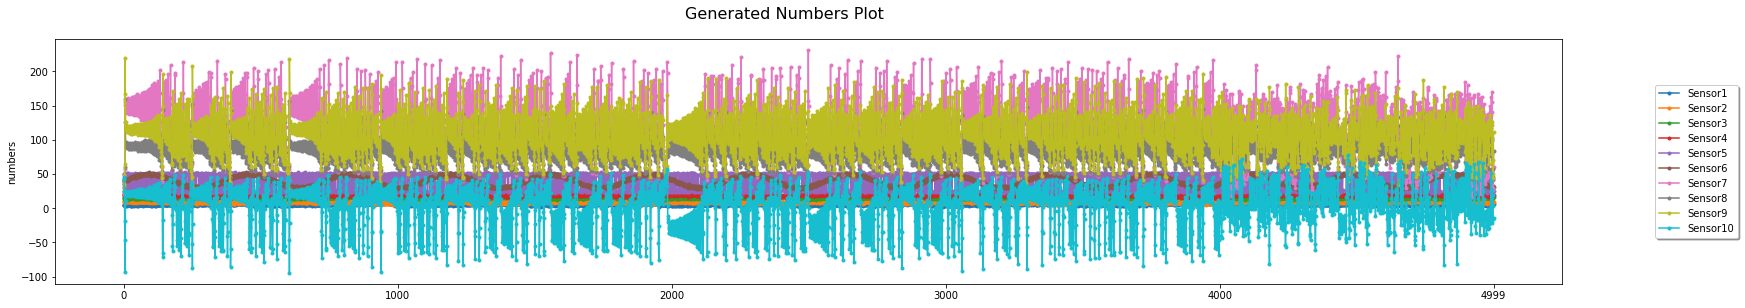

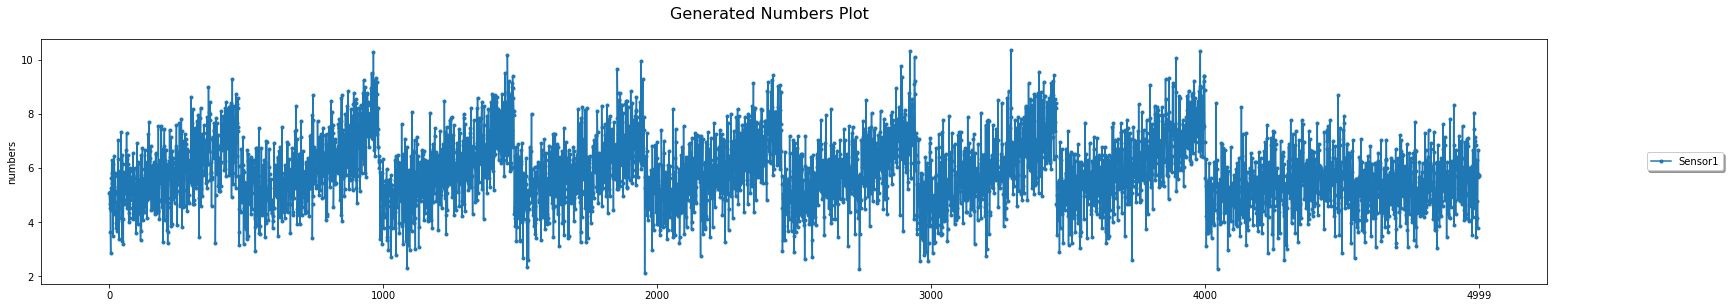

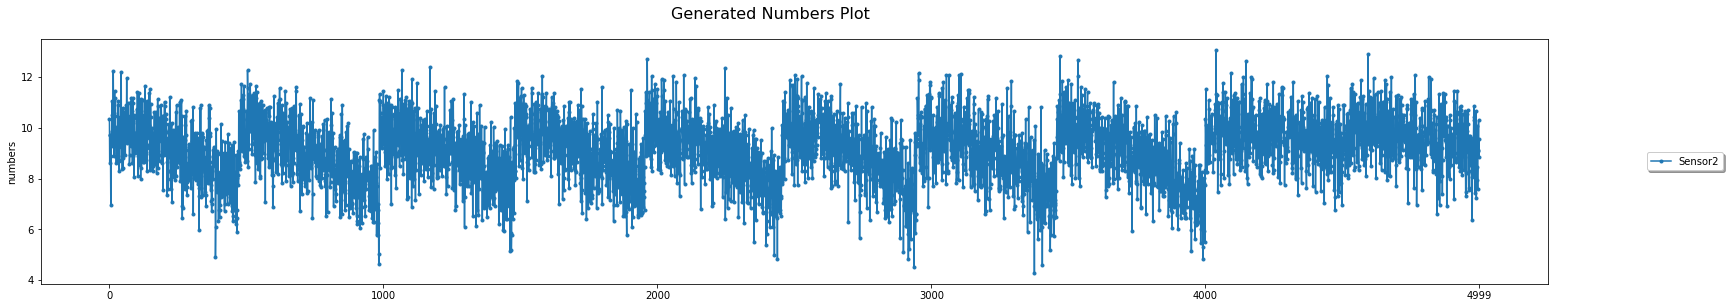

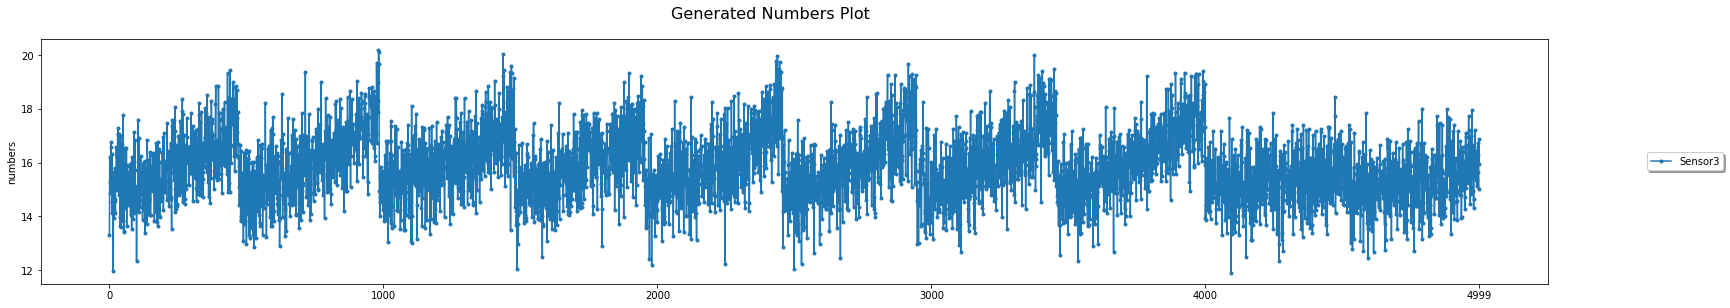

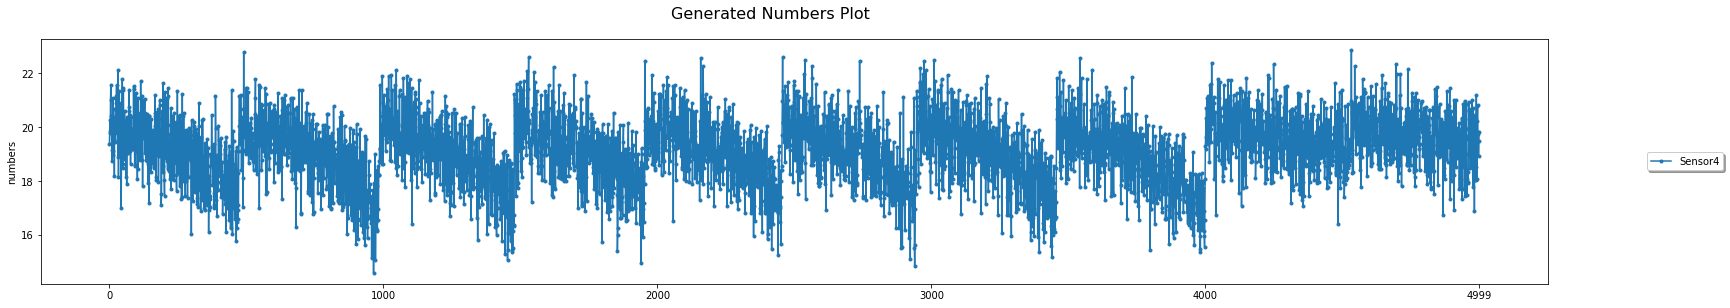

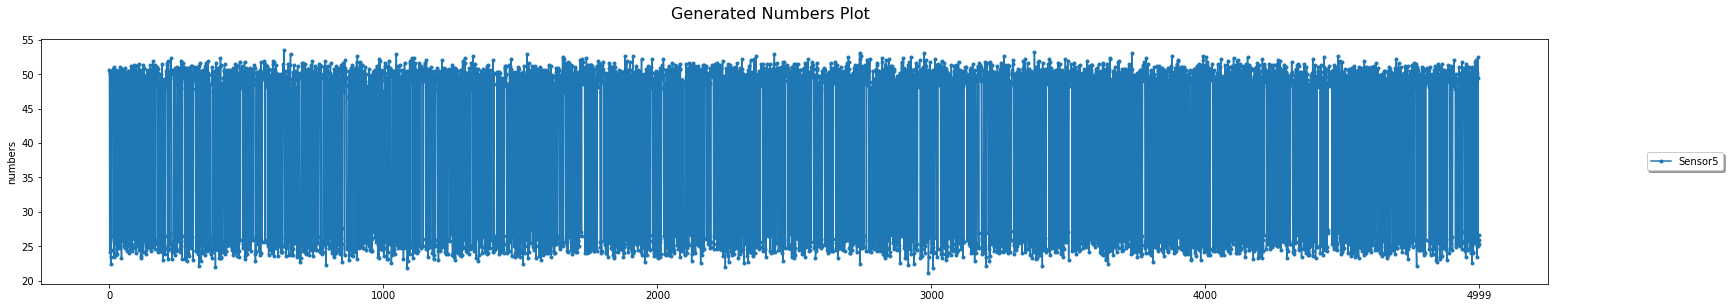

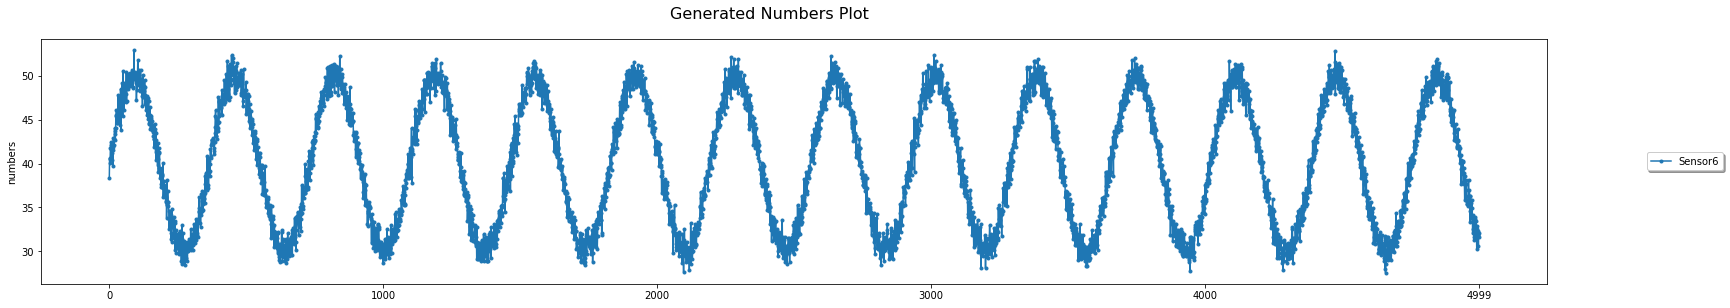

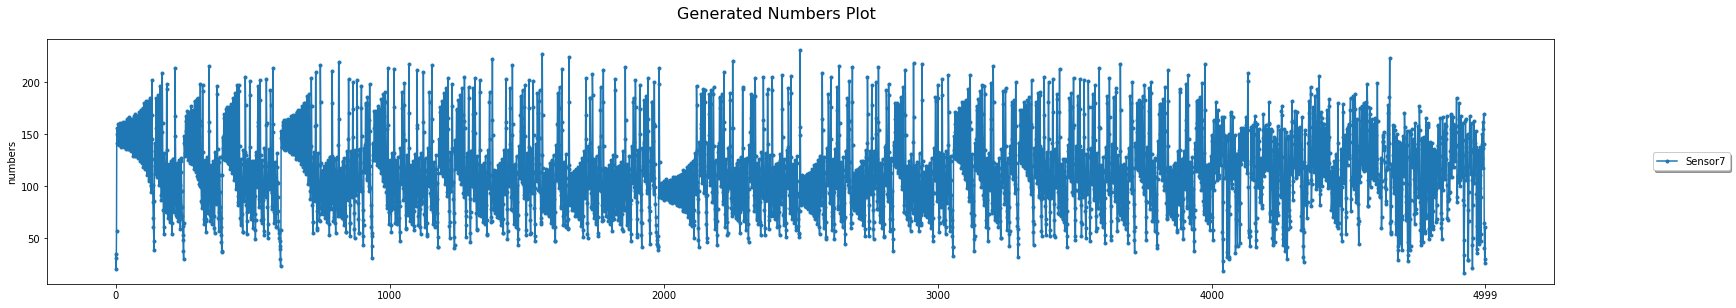

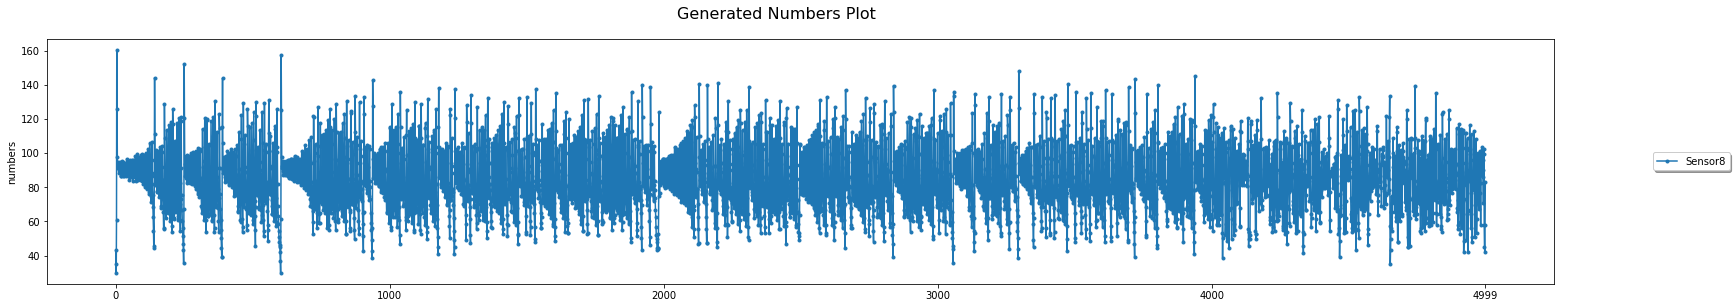

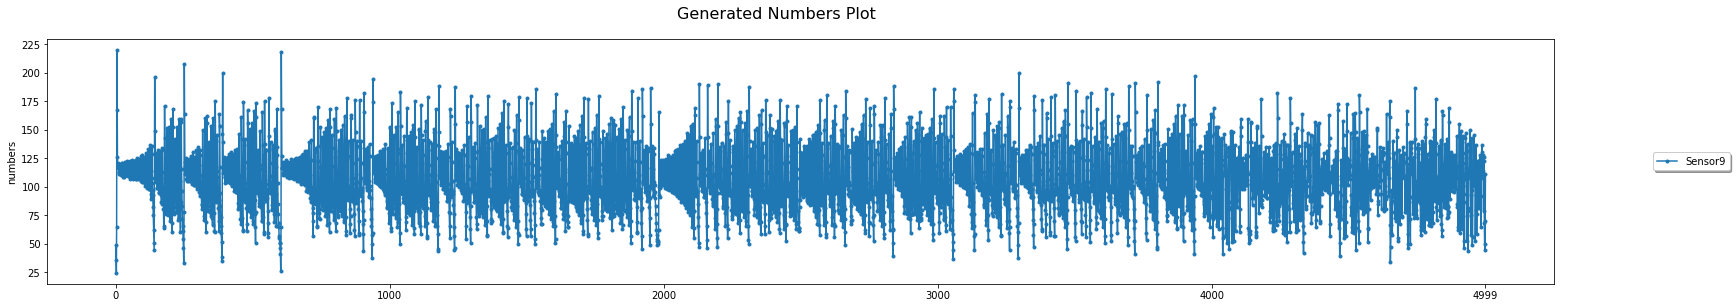

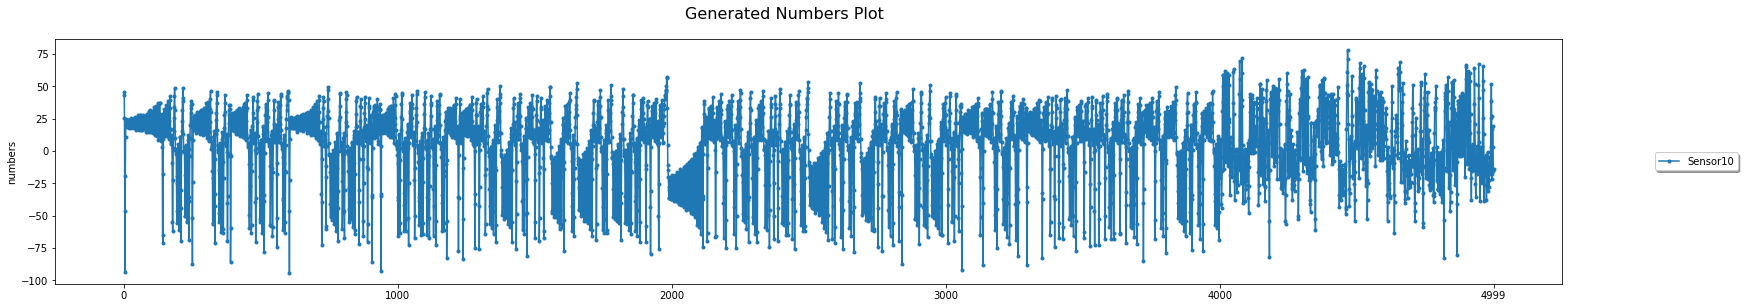

In [9]:
# plot all Sensors
dg.plot_data()
# plot by Sensor
for i in range(1, 11):
    dg.plot_data(sensors=["Sensor"+str(i)])